In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools.eval_measures import rmse

In [2]:
pga = pd.read_csv('pgaTourData.csv')
#display(pga.head(10))

print(pga.shape)
print(pga.info())

(2312, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64


In [3]:
pga.head()

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0            -0.207             1.153   0.427   0.960  -0.027  $2,680,487  
1            -0.058             0.337  -0.012   0.213   0.194  $2,485,203  
2             0.192             0.674   0.183   0.437  -0.137  $2,700,018  
3            -0.271             0.941   0.406   0.532   0.273  $1,986,608  
4             0.164             0.062  -0.227   0.099   0.026  $1,089,763

In [4]:
# eleiminacja błędnie rozpoznanych typów zmienncyh

pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)

pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)
pga

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_21783/3285611533.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_21783/3285611533.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)


Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
0         Henrik Stenson    60.0               75.19  2018         291.5   
1            Ryan Armour   109.0               73.58  2018         283.5   
2            Chez Reavie    93.0               72.24  2018         286.5   
3             Ryan Moore    78.0               71.94  2018         289.2   
4           Brian Stuard   103.0               71.44  2018         278.9   
...                  ...     ...                 ...   ...           ...   
2307        Carl Paulson     NaN                 NaN  2012           NaN   
2308      Peter Tomasulo     NaN                 NaN  2012           NaN   
2309        Marc Turnesa     NaN                 NaN  2010           NaN   
2310     Jesper Parnevik     NaN                 NaN  2010           NaN   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN   

        gir  Average Putts  Average Scrambling  Average Score  Points  Wins  \
0     73.51          29.93               60.67         69.617   868.0   NaN   
1     68.22          29.31               60.13         70.758  1006.0   1.0   
2     68.67          29.12               62.27         70.432  1020.0   NaN   
3     68.80          29.17               64.16         70.015   795.0   NaN   
4     67.12          29.11               59.23         71.038   421.0   NaN   
...     ...            ...                 ...            ...     ...   ...   
2307    NaN            NaN                 NaN            NaN     NaN   NaN   
2308    NaN            NaN                 NaN            NaN     NaN   NaN   
2309    NaN            NaN                 NaN            NaN     NaN   NaN   
2310    NaN            NaN                 NaN            NaN     NaN   NaN   
2311    NaN            NaN                 NaN            NaN     NaN   NaN   

      Top 10  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
0        5.0            -0.207             1.153   0.427   0.960  -0.027   
1        3.0            -0.058             0.337  -0.012   0.213   0.194   
2        3.0             0.192             0.674   0.183   0.437  -0.137   
3        5.0            -0.271             0.941   0.406   0.532   0.273   
4        3.0             0.164             0.062  -0.227   0.099   0.026   
...      ...               ...               ...     ...     ...     ...   
2307     NaN               NaN               NaN     NaN     NaN     NaN   
2308     NaN               NaN               NaN     NaN     NaN     NaN   
2309     NaN               NaN               NaN     NaN     NaN     NaN   
2310     NaN               NaN               NaN     NaN     NaN     NaN   
2311     NaN               NaN               NaN     NaN     NaN     NaN   

          Money  
0     2680487.0  
1     2485203.0  
2     2700018.0  
3     1986608.0  
4     1089763.0  
...         ...  
2307    16943.0  
2308    12827.0  
2309    10159.0  
2310     9165.0  
2311     6552.0  

[2312 rows x 18 columns]

In [5]:
pga.columns = pga.columns.str.replace(' ','_')
pga

Player_Name  Rounds  Fairway_Percentage  Year  Avg_Distance  \
0         Henrik Stenson    60.0               75.19  2018         291.5   
1            Ryan Armour   109.0               73.58  2018         283.5   
2            Chez Reavie    93.0               72.24  2018         286.5   
3             Ryan Moore    78.0               71.94  2018         289.2   
4           Brian Stuard   103.0               71.44  2018         278.9   
...                  ...     ...                 ...   ...           ...   
2307        Carl Paulson     NaN                 NaN  2012           NaN   
2308      Peter Tomasulo     NaN                 NaN  2012           NaN   
2309        Marc Turnesa     NaN                 NaN  2010           NaN   
2310     Jesper Parnevik     NaN                 NaN  2010           NaN   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN   

        gir  Average_Putts  Average_Scrambling  Average_Score  Points  Wins  \
0     73.51          29.93               60.67         69.617   868.0   NaN   
1     68.22          29.31               60.13         70.758  1006.0   1.0   
2     68.67          29.12               62.27         70.432  1020.0   NaN   
3     68.80          29.17               64.16         70.015   795.0   NaN   
4     67.12          29.11               59.23         71.038   421.0   NaN   
...     ...            ...                 ...            ...     ...   ...   
2307    NaN            NaN                 NaN            NaN     NaN   NaN   
2308    NaN            NaN                 NaN            NaN     NaN   NaN   
2309    NaN            NaN                 NaN            NaN     NaN   NaN   
2310    NaN            NaN                 NaN            NaN     NaN   NaN   
2311    NaN            NaN                 NaN            NaN     NaN   NaN   

      Top_10  Average_SG_Putts  Average_SG_Total  SG:OTT  SG:APR  SG:ARG  \
0        5.0            -0.207             1.153   0.427   0.960  -0.027   
1        3.0            -0.058             0.337  -0.012   0.213   0.194   
2        3.0             0.192             0.674   0.183   0.437  -0.137   
3        5.0            -0.271             0.941   0.406   0.532   0.273   
4        3.0             0.164             0.062  -0.227   0.099   0.026   
...      ...               ...               ...     ...     ...     ...   
2307     NaN               NaN               NaN     NaN     NaN     NaN   
2308     NaN               NaN               NaN     NaN     NaN     NaN   
2309     NaN               NaN               NaN     NaN     NaN     NaN   
2310     NaN               NaN               NaN     NaN     NaN     NaN   
2311     NaN               NaN               NaN     NaN     NaN     NaN   

          Money  
0     2680487.0  
1     2485203.0  
2     2700018.0  
3     1986608.0  
4     1089763.0  
...         ...  
2307    16943.0  
2308    12827.0  
2309    10159.0  
2310     9165.0  
2311     6552.0  

[2312 rows x 18 columns]

In [6]:
pga.describe()

Rounds  Fairway_Percentage         Year  Avg_Distance  \
count  1678.000000         1678.000000  2312.000000   1678.000000   
mean     78.711561           61.440560  2013.996107    290.807688   
std      14.274137            5.058845     2.581176      8.916631   
min      45.000000           43.020000  2010.000000    266.400000   
25%      69.000000           57.942500  2012.000000    284.900000   
50%      79.500000           61.430000  2014.000000    290.550000   
75%      89.000000           64.910000  2016.000000    296.400000   
max     120.000000           76.880000  2018.000000    319.700000   

               gir  Average_Putts  Average_Scrambling  Average_Score  \
count  1678.000000    1678.000000         1678.000000    1678.000000   
mean     65.661675      29.163331           58.115638      70.921961   
std       2.745411       0.518468            3.384769       0.698305   
min      53.540000      27.510000           44.010000      68.698000   
25%      63.830000      28.810000           55.900000      70.494250   
50%      65.790000      29.140000           58.275000      70.902000   
75%      67.580000      29.520000           60.420000      71.342750   
max      73.520000      31.000000           69.330000      74.400000   

            Points        Wins       Top_10  Average_SG_Putts  \
count  2296.000000  293.000000  1458.000000       1678.000000   
mean    481.663328    1.218430     2.781893          0.025641   
std     463.067732    0.573443     1.895094          0.343787   
min       1.000000    1.000000     1.000000         -1.475000   
25%     113.000000    1.000000     1.000000         -0.187000   
50%     381.500000    1.000000     2.000000          0.040000   
75%     676.000000    1.000000     4.000000          0.257000   
max    4169.000000    5.000000    14.000000          1.130000   

       Average_SG_Total       SG:OTT       SG:APR       SG:ARG         Money  
count       1678.000000  1678.000000  1678.000000  1678.000000  2.300000e+03  
mean           0.148105     0.037759     0.065015     0.019974  1.124903e+06  
std            0.694923     0.379892     0.380952     0.223361  1.354085e+06  
min           -3.209000    -1.717000    -1.680000    -0.930000  5.520000e+03  
25%           -0.254750    -0.190250    -0.180750    -0.123000  1.853258e+05  
50%            0.147000     0.056000     0.081000     0.022000  6.994425e+05  
75%            0.568500     0.291500     0.314500     0.175000  1.526660e+06  
max            2.406000     1.485000     1.533000     0.660000  1.203046e+07

# Czy występują duplikaty?

In [7]:
#W zbiorze nie występują duplikacje całkowite (ze względu na kombinacje Nazwiska gracza i roku)
pga[pga.duplicated(subset=['Player_Name', 'Year'])]

Empty DataFrame
Columns: [Player_Name, Rounds, Fairway_Percentage, Year, Avg_Distance, gir, Average_Putts, Average_Scrambling, Average_Score, Points, Wins, Top_10, Average_SG_Putts, Average_SG_Total, SG:OTT, SG:APR, SG:ARG, Money]
Index: []

# Dobór zmiennych do modelu

In [8]:
pga_columns = pga.columns
# ['Player_Name', 'Rounds', 'Fairway_Percentage', 'Year', 'Avg_Distance',
#       'gir', 'Average_Putts', 'Average_Scrambling', 'Average_Score', 'Points',
#       'Wins', 'Top_10', 'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT',
#       'SG:APR', 'SG:ARG', 'Money']

list_X = ['Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points']

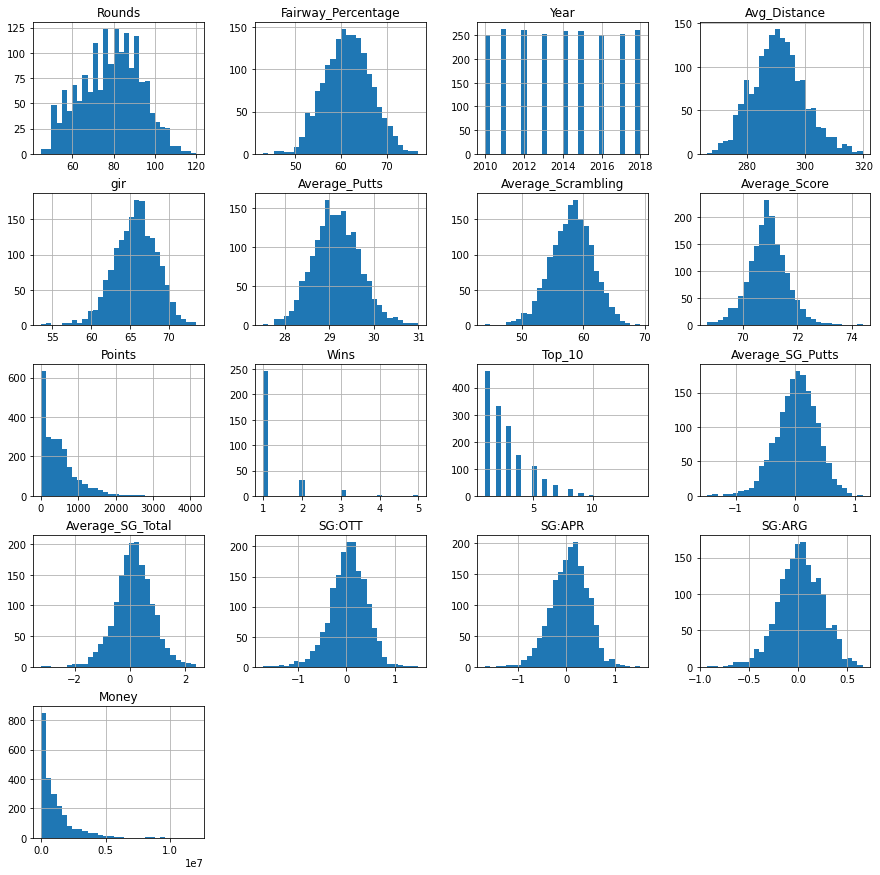

In [9]:
pga.hist(bins=30, figsize=(15, 15));

Index(['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts',
       'Average_Scrambling', 'Average_Score', 'Points', 'Top_10',
       'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


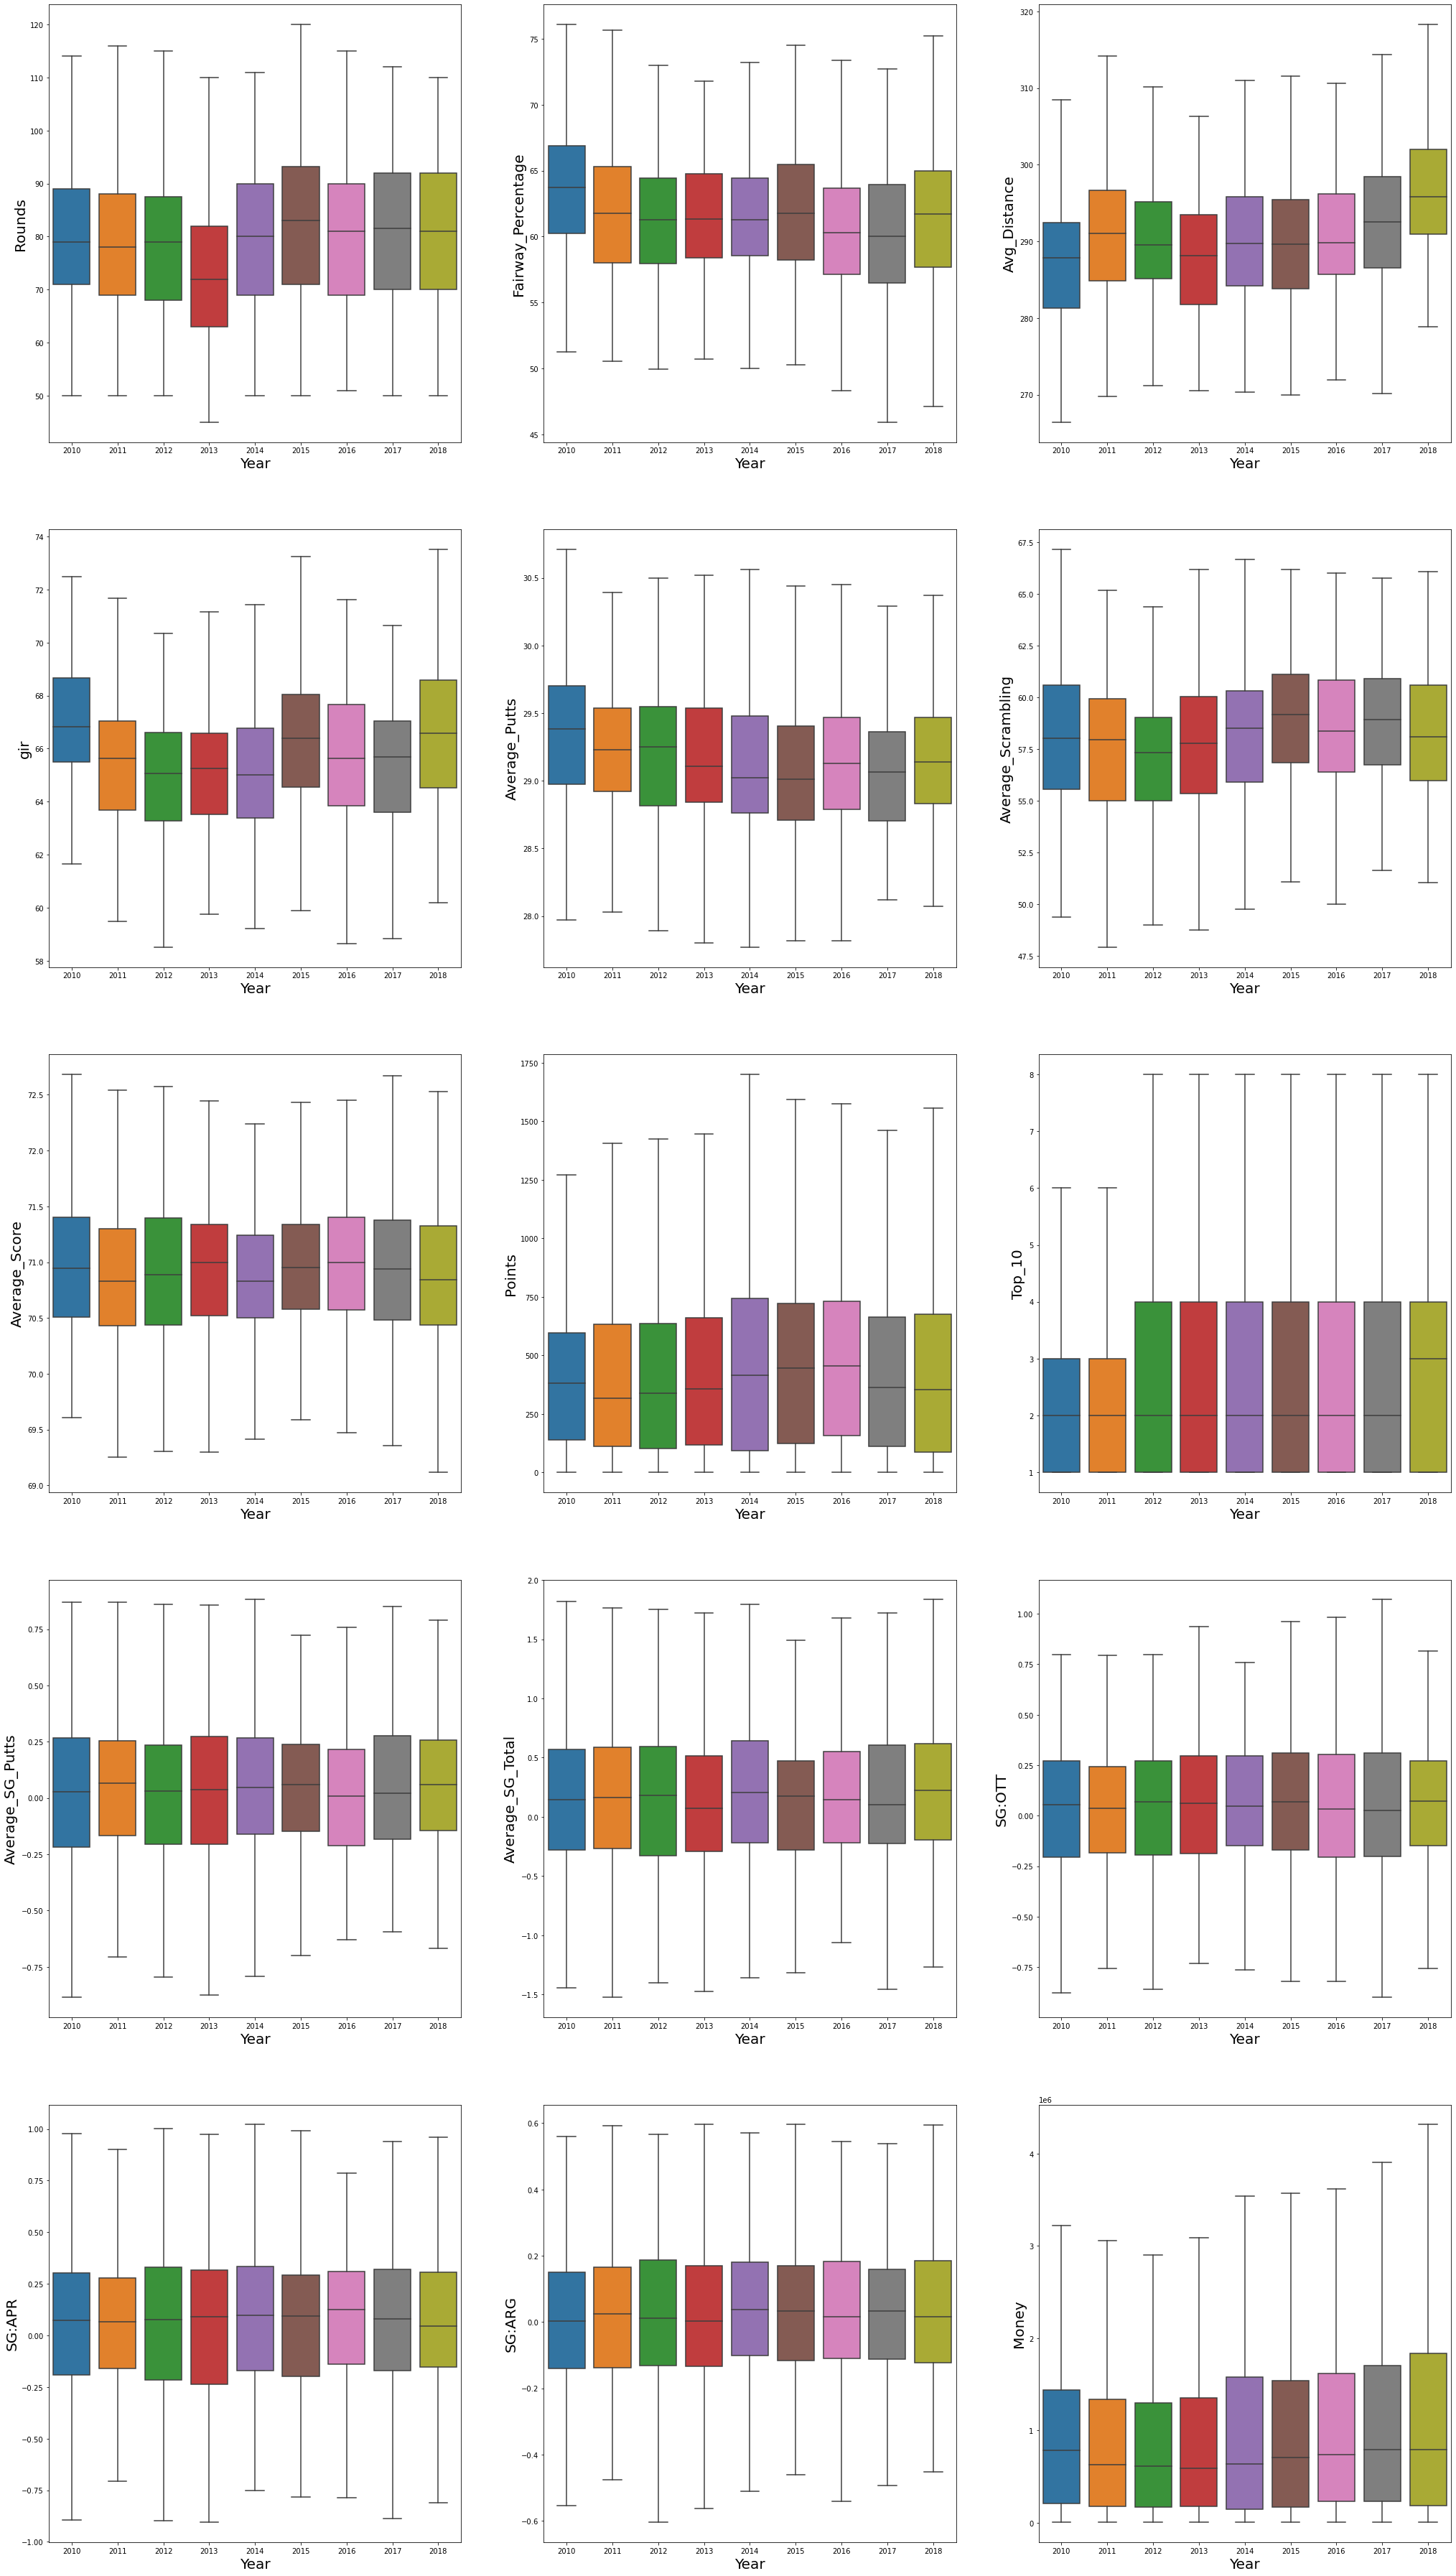

In [10]:
# Źródło: https://www.kaggle.com/code/jmpark746/pga-tour-machine-learning-project/notebook
# Zmiany rozkładów zmiennych w czasie

f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = pga.loc[:,(pga.columns!='Player_Name') & (pga.columns!='Wins')].columns
distribution = distribution[distribution != 'Year']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Year', y = column, data=pga, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Year',fontsize=20)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [11]:
pga.isna().sum()

Player_Name              0
Rounds                 634
Fairway_Percentage     634
Year                     0
Avg_Distance           634
gir                    634
Average_Putts          634
Average_Scrambling     634
Average_Score          634
Points                  16
Wins                  2019
Top_10                 854
Average_SG_Putts       634
Average_SG_Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

In [12]:
pga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Points              2296 non-null   float64
 10  Wins                293 non-null    float64
 11  Top_10              1458 non-null   float64
 12  Average_SG_Putts    1678 non-null   float64
 13  Average_SG_Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

<AxesSubplot:>

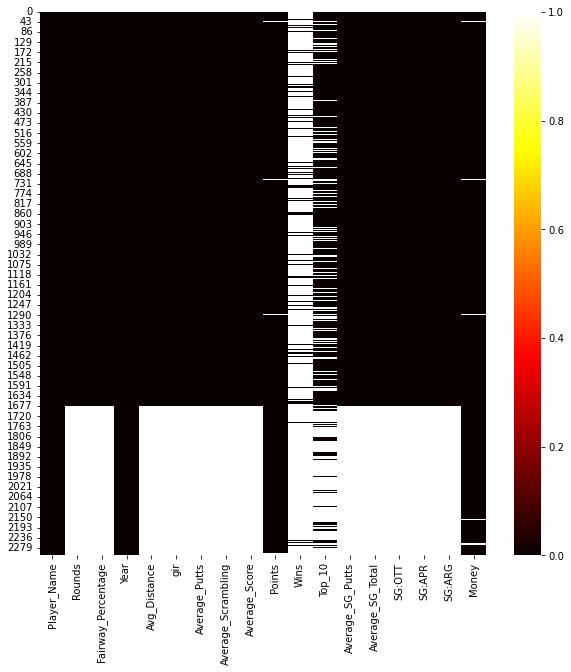

In [13]:
# Heatmapa brakujących zmiennych
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

# Dane do scenariusza 1 - imputacja

In [14]:
# Replaced NaN with 0 in Top 10 , BECAUSE they were MNAR
pga['Top_10'].fillna(0, inplace=True)
pga['Top_10'] = pga['Top_10'].astype(int)

# Replaced NaN with 0 in # of wins
pga['Wins'].fillna(0, inplace=True)
pga['Wins'] = pga['Wins'].astype(int)

# Drop NaN values 
#df.dropna(axis = 0, inplace=True)


<AxesSubplot:>

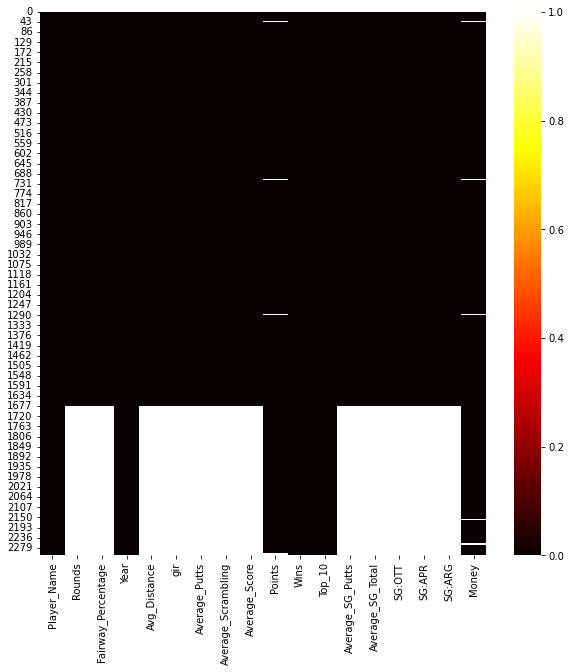

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

In [16]:
pga_clean = pga.dropna(subset=['Rounds'], how='any')

print(pga_clean.isna().sum())
pga_clean.shape

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                4
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 4
dtype: int64


(1678, 18)

In [17]:
pga_clean[pga_clean['Points'].isnull()]

Player_Name  Rounds  Fairway_Percentage  Year  Avg_Distance  \
41    Kiradech Aphibarnrat    51.0               65.12  2018         294.7   
713        Patrick Rodgers    57.0               56.97  2015         307.7   
901          Brooks Koepka    56.0               56.91  2014         307.0   
1287          Ryo Ishikawa    54.0               53.28  2012         290.0   

        gir  Average_Putts  Average_Scrambling  Average_Score  Points  Wins  \
41    62.20          28.93               55.59         70.629     NaN     0   
713   66.77          28.98               56.47         70.619     NaN     0   
901   64.98          28.95               57.51         70.052     NaN     0   
1287  59.61          29.44               54.44         70.854     NaN     0   

      Top_10  Average_SG_Putts  Average_SG_Total  SG:OTT  SG:APR  SG:ARG  \
41         0             0.138             0.511   0.485  -0.247   0.135   
713        0            -0.003             0.129   0.680  -0.456  -0.090   
901        0             0.162             0.958   0.425   0.598  -0.226   
1287       0             0.196            -0.038  -0.199   0.069  -0.104   

      Money  
41      NaN  
713     NaN  
901     NaN  
1287    NaN

<AxesSubplot:xlabel='Average_SG_Total', ylabel='Points'>

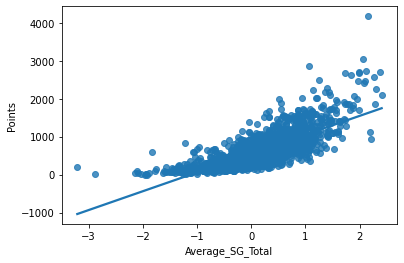

In [18]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

In [19]:
pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
pga_clean['log_Points'] = np.log(pga['Points'])

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_21783/3866320302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_21783/3866320302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_21783/3866320302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Text(0, 0.5, 'Points^0.25')

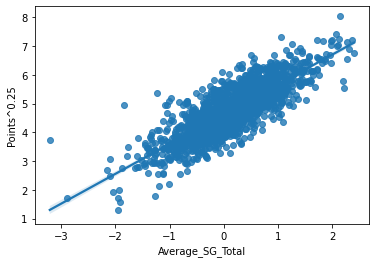

In [20]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="sqrt_Points_x2")
plt.ylabel('Points^0.25')

In [21]:
model_missing = ols('sqrt_Points_x2 ~ Average_SG_Total', data = pga_clean, missing='drop').fit()
print(model_missing.params)

#model_missing.predict(pga.loc[[41, 713,901, 1287],'Average SG Total'])


Intercept           4.63113
Average_SG_Total    1.03602
dtype: float64


In [22]:
missing_Points = (model_missing.params[0] + model_missing.params[1]*pga_clean.loc[[41, 713,901, 1287],
                                                                                  'Average_SG_Total'])**4
pga_clean.loc[[41, 713,901, 1287],'Points'] = missing_Points
missing_Points

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


41       709.217336
713      515.430582
901     1000.159333
1287     444.546511
Name: Average_SG_Total, dtype: float64

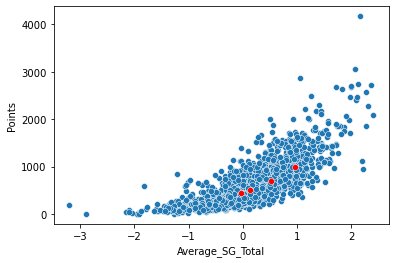

In [23]:
sns.scatterplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

sns.scatterplot(x=pga_clean.loc[[41, 713,901, 1287],'Average_SG_Total'], y=missing_Points, color='red')
plt.show()

In [24]:
pga_clean.isna().sum()

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                0
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 4
sqrt_Points           4
sqrt_Points_x2        4
log_Points            4
dtype: int64

In [25]:
pga_clean = pga_clean.drop(columns='sqrt_Points')
pga_clean = pga_clean.drop(columns='sqrt_Points_x2')
pga_clean = pga_clean.drop(columns='log_Points')

#pga_clean

# Correlations and distributions

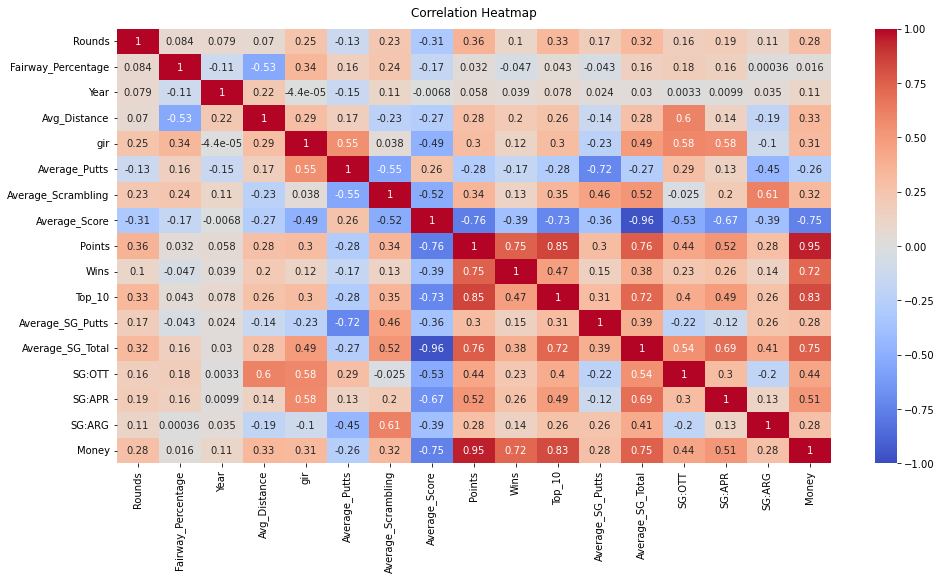

In [26]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(pga_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

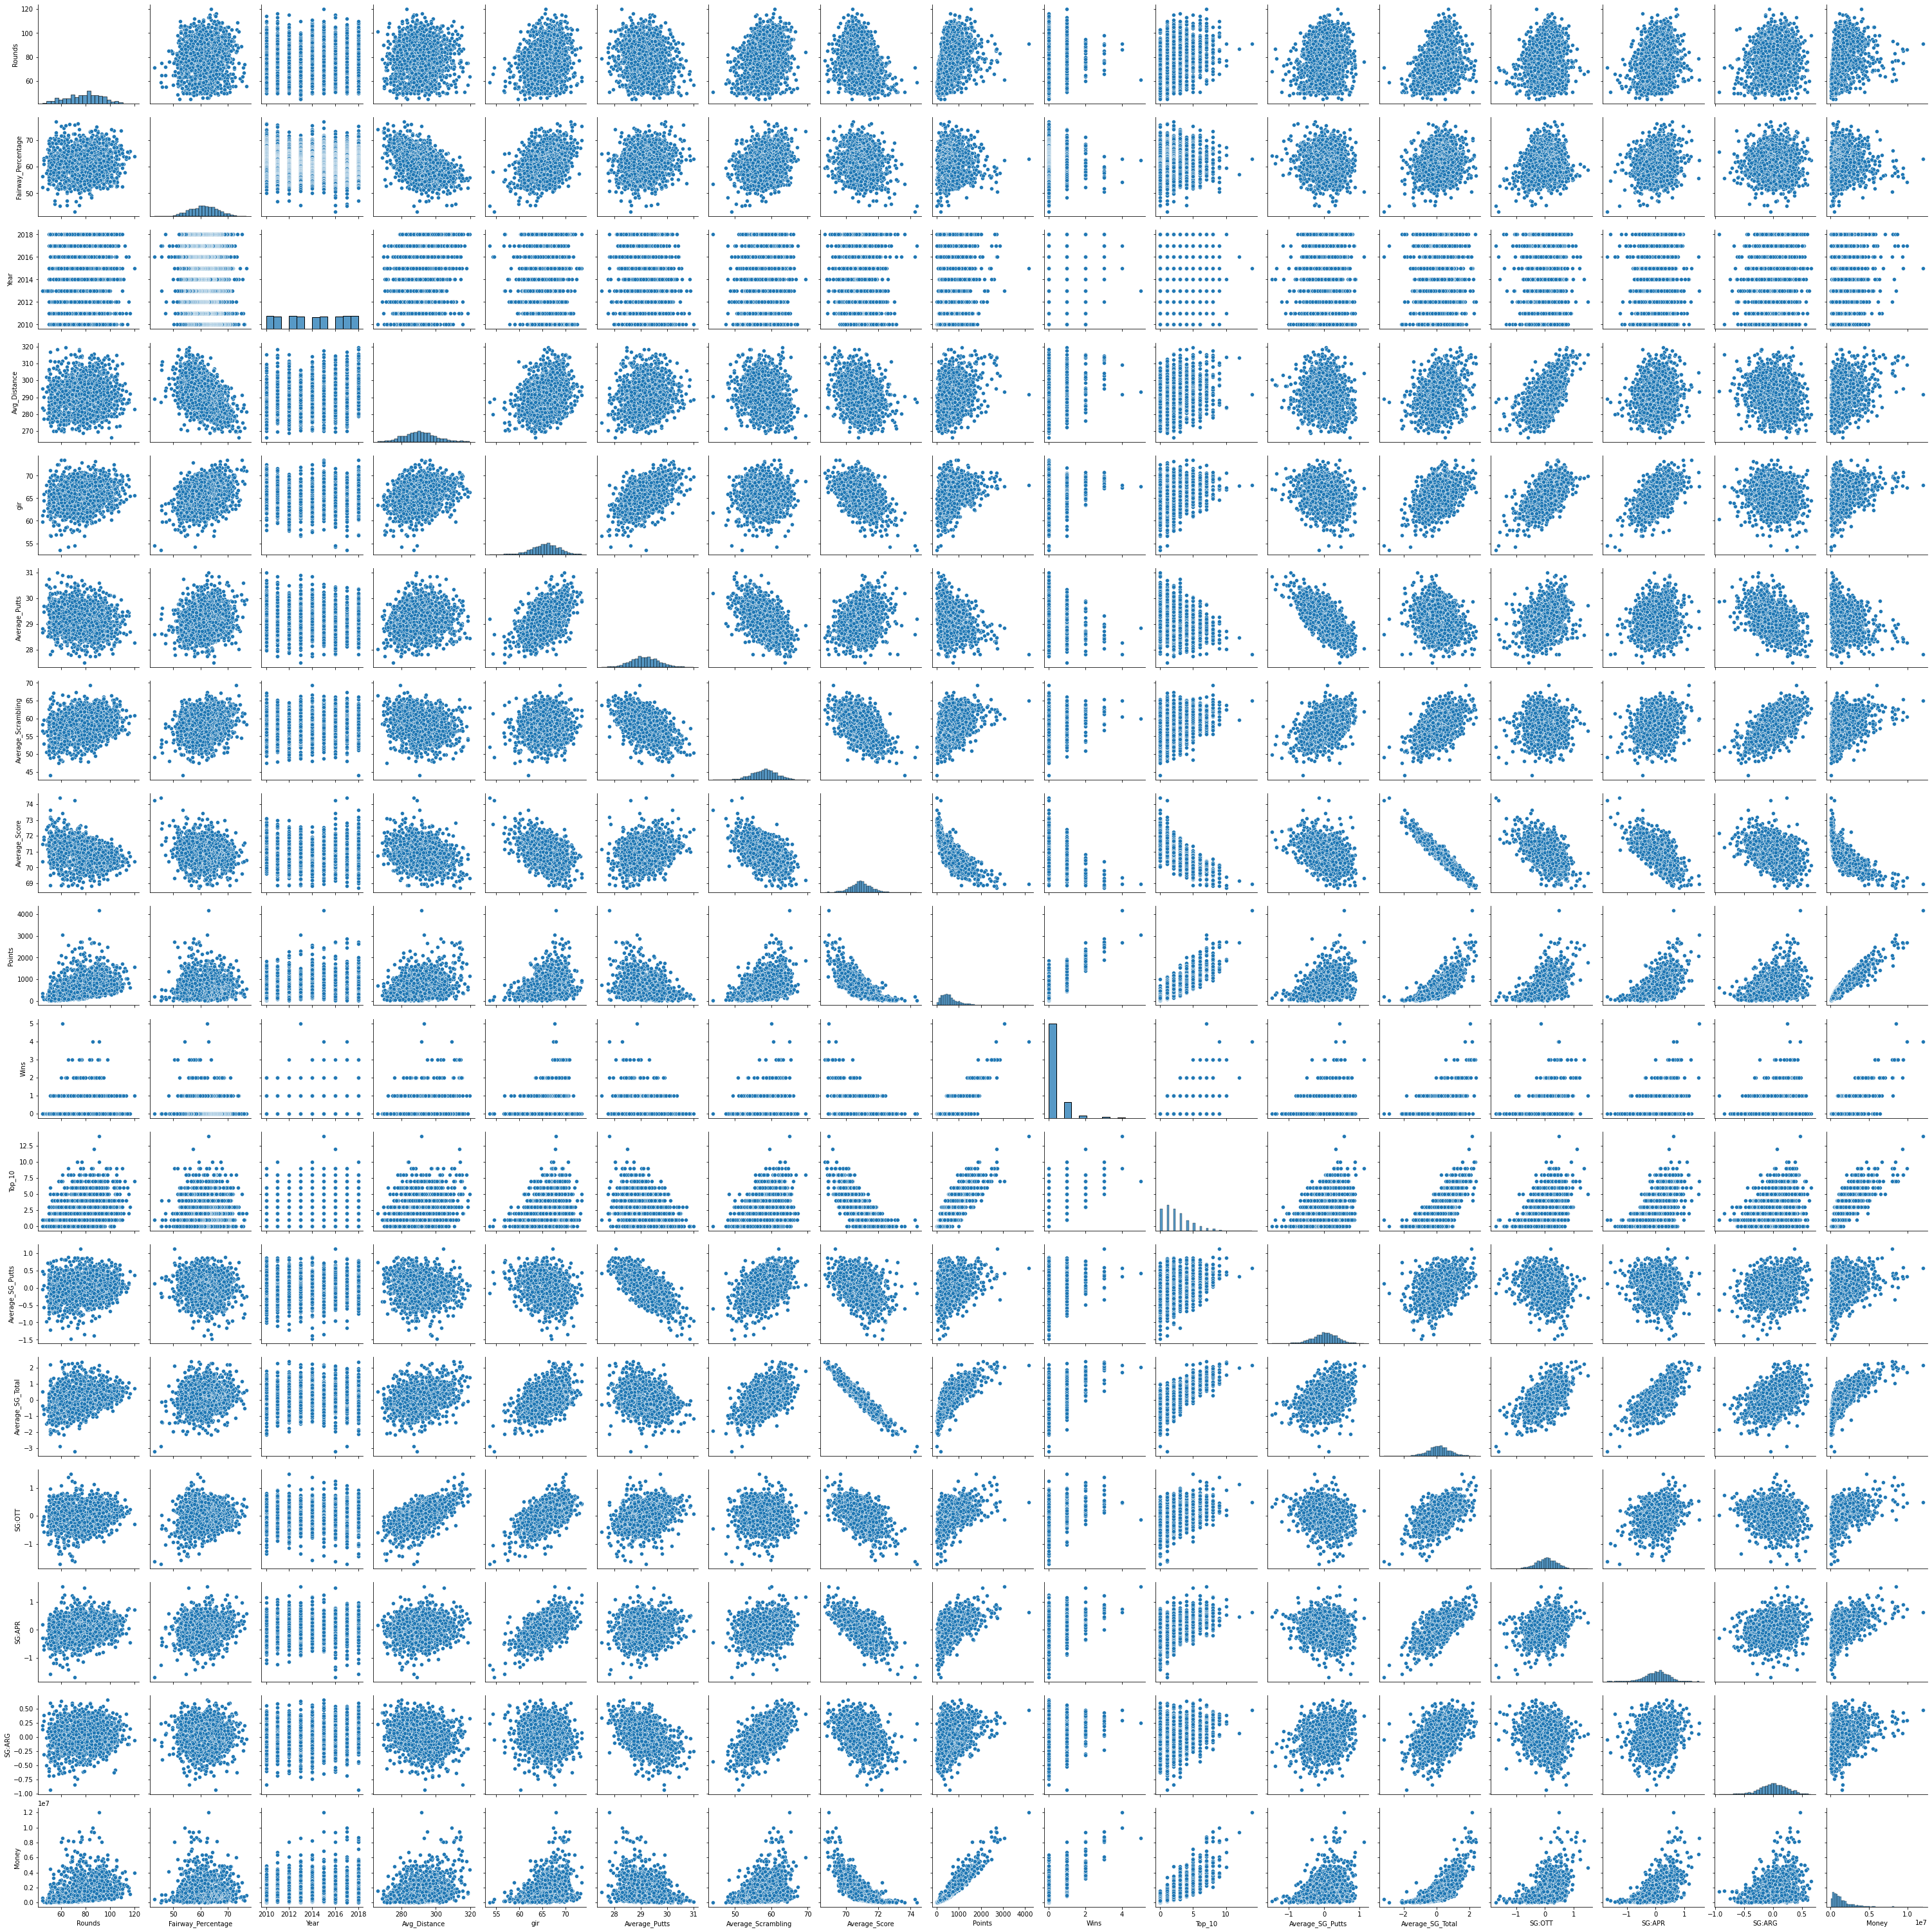

In [27]:
sns.pairplot(pga_clean)

# Looking for outliers in pga_clean

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Points'>

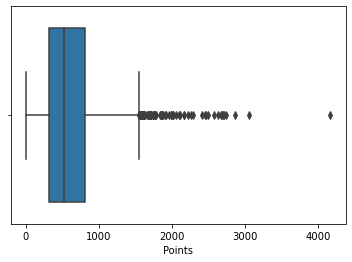

In [28]:
sns.boxplot(pga_clean["Points"])

In [29]:
IQR = pga_clean.quantile(0.75) - pga_clean.quantile(0.25)
IQR
LOW = pga_clean.quantile(0.25) - IQR
HIGH = pga_clean.quantile(0.75) + IQR

In [30]:
round(LOW, 2)

Rounds                    49.00
Fairway_Percentage        50.97
Year                    2008.00
Avg_Distance             273.40
gir                       60.08
Average_Putts             28.10
Average_Scrambling        51.38
Average_Score             69.65
Points                  -169.75
Wins                       0.00
Top_10                    -1.00
Average_SG_Putts          -0.63
Average_SG_Total          -1.08
SG:OTT                    -0.67
SG:APR                    -0.68
SG:ARG                    -0.42
Money                -761195.75
dtype: float64

In [31]:
round(HIGH, 2)

Rounds                    109.00
Fairway_Percentage         71.88
Year                     2020.00
Avg_Distance              307.90
gir                        71.33
Average_Putts              30.23
Average_Scrambling         64.94
Average_Score              72.19
Points                   1305.50
Wins                        0.00
Top_10                      5.00
Average_SG_Putts            0.70
Average_SG_Total            1.39
SG:OTT                      0.77
SG:APR                      0.81
SG:ARG                      0.47
Money                 3219315.25
dtype: float64

In [32]:
pga_clean[pga_clean['Points']>HIGH['Points']]

Player_Name  Rounds  Fairway_Percentage  Year  Avg_Distance  \
32           Justin Rose    70.0               66.02  2018         303.5   
46    Francesco Molinari    73.0               65.04  2018         301.0   
77            Paul Casey    74.0               63.14  2018         304.3   
89          Webb Simpson    95.0               62.34  2018         293.7   
91     Bryson DeChambeau    93.0               62.23  2018         305.7   
...                  ...     ...                 ...   ...           ...   
1632           Ernie Els    72.0               60.16  2010         288.4   
1657      Dustin Johnson    83.0               56.35  2010         308.5   
1661        Bubba Watson    77.0               55.67  2010         309.8   
1662        Jeff Overton    89.0               55.44  2010         297.3   
1673      Phil Mickelson    76.0               52.66  2010         299.1   

        gir  Average_Putts  Average_Scrambling  Average_Score  Points  Wins  \
32    69.95          28.67               63.03         68.993  1991.0     2   
46    70.24          29.63               58.67         69.797  1682.0     2   
77    67.84          29.07               60.58         69.850  1319.0     1   
89    67.93          28.47               66.10         69.293  1710.0     1   
91    69.65          29.18               59.84         69.646  1617.0     1   
...     ...            ...                 ...            ...     ...   ...   
1632  67.86          28.99               61.23         69.843  1846.0     2   
1657  67.95          29.37               55.81         70.135  1362.0     1   
1661  68.54          29.40               55.50         70.229  1498.0     1   
1662  66.86          29.04               56.80         70.497  1536.0     0   
1673  65.13          28.79               61.84         69.966  1629.0     1   

      Top_10  Average_SG_Putts  Average_SG_Total  SG:OTT  SG:APR  SG:ARG  \
32         8             0.424             1.952   0.551   0.526   0.450   
46         4            -0.487             1.123   0.690   0.593   0.327   
77         5             0.133             0.966   0.138   0.586   0.109   
89         7             0.692             1.432  -0.116   0.486   0.370   
91         7             0.346             1.558   0.586   0.556   0.070   
...      ...               ...               ...     ...     ...     ...   
1632       6             0.330             1.322   0.215   0.735   0.043   
1657       5             0.112             0.979   0.760   0.288  -0.179   
1661       4            -0.077             0.695   0.798   0.140  -0.168   
1662       6             0.409             0.630   0.232   0.064  -0.074   
1673       5            -0.147             1.001   0.185   0.738   0.228   

          Money  
32    8130678.0  
46    5065842.0  
77    3641771.0  
89    5376417.0  
91    8094489.0  
...         ...  
1632  4558861.0  
1657  4473122.0  
1661  3198998.0  
1662  3456356.0  
1673  3821733.0  

[141 rows x 18 columns]

In [33]:
pga_clean[pga_clean['Points']<LOW['Points']]

Empty DataFrame
Columns: [Player_Name, Rounds, Fairway_Percentage, Year, Avg_Distance, gir, Average_Putts, Average_Scrambling, Average_Score, Points, Wins, Top_10, Average_SG_Putts, Average_SG_Total, SG:OTT, SG:APR, SG:ARG, Money]
Index: []

In [34]:
pga_no_outliers = pga_clean[pga_clean['Points']<HIGH['Points']]
len(pga_no_outliers)

1537

# REGRESSION STATSMODELS

Datasets: pga_clean

1. Statsmodels regression
2. Metrics
3. Improvement of the model

In [35]:
Years_model = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Year_test = 2018

pga_clean_test = pga_clean[pga_clean['Year'] == 2018]
pga_clean = pga_clean.query('Year == [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]')

pga_no_outliers_test = pga_no_outliers[pga_no_outliers['Year'] == 2018]
pga_no_outliers = pga_no_outliers.query('Year == [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]')

In [36]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

## Scenariusz 1 - wersja inicjalna

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          5.27e-305
Time:                        11:57:13   Log-Likelihood:                -10452.
No. Observations:                1485   AIC:                         2.093e+04
Df Residuals:                    1474   BIC:                         2.098e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.348e+04   2997.259      7.834      0.000    1.76e+04    2.94e+04
Fairway_Percentage    -7.1536      3.078     -2.324      0.020     -13.191      -1.116
Avg_Distance          -2.0855      2.172     -0.960      0.337      -6.346       2.175
gir                    2.2210      5.723      0.388      0.698      -9.005      13.447
Average_Putts       -196.5326     32.938     -5.967      0.000    -261.142    -131.923
Average_Scrambling   -15.2172      3.494     -4.356      0.000     -22.070      -8.364
Average_Score       -216.7802     39.736     -5.456      0.000    -294.725    -138.835
Average_SG_Putts     175.6626     47.646      3.687      0.000      82.201     269.124
SG:OTT               386.5656     54.439      7.101      0.000     279.780     493.351
SG:APR               312.0929     43.876      7.113      0.000     226.028     398.158
SG:ARG               238.7308     55.627      4.292      0.000     129.614     347.848
==============================================================================
Omnibus:                      512.270   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2938.861
Skew:                           1.494   Prob(JB):                         0.00
Kurtosis:                       9.210   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: 5.045876605436206e-09
Błąd standardowy składników losowych: 275.77372666170874


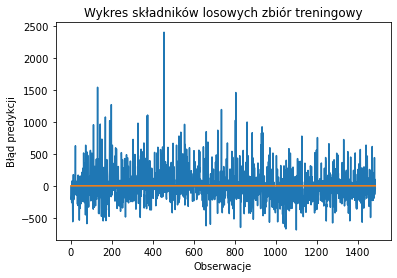

In [37]:
# SCENARIUSZ 1 - regresja po imputacji

X = pga_clean[pga_clean.columns.intersection(list_X)]
X = sm.tools.add_constant(X)
y = pga_clean["Points"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych zbiór treningowy')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())
#print(errors)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Suma składników losowych: -3136.3445354268015
Błąd standardowy składników losowych: 287.85709432237473
RMSE:  287.56990437630105


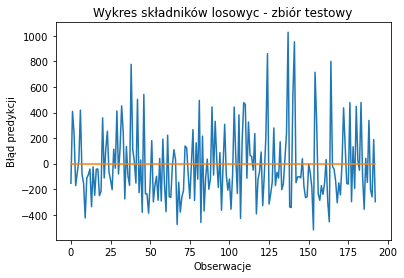

In [38]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_clean_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowyc - zbiór testowy')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)


## Scenariusz 1

In [39]:
print(len(pga_clean))
print(len(pga_clean_test))

1485
193


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     306.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          2.77e-307
Time:                        11:57:13   Log-Likelihood:                -10452.
No. Observations:                1485   AIC:                         2.092e+04
Df Residuals:                    1476   BIC:                         2.097e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.266e+04   2875.262      7.882      0.000     1.7e+04    2.83e+04
Fairway_Percentage    -4.5777      1.569     -2.917      0.004      -7.656      -1.499
Average_Putts       -191.0083     23.759     -8.040      0.000    -237.613    -144.404
Average_Scrambling   -14.6823      3.360     -4.370      0.000     -21.272      -8.092
Average_Score       -216.6712     39.455     -5.492      0.000    -294.066    -139.277
Average_SG_Putts     178.0318     46.421      3.835      0.000      86.973     269.091
SG:OTT               358.1319     43.699      8.195      0.000     272.413     443.851
SG:APR               316.2916     42.593      7.426      0.000     232.743     399.841
SG:ARG               241.6599     55.502      4.354      0.000     132.789     350.531
==============================================================================
Omnibus:                      511.185   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2959.735
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                       9.244   Cond. No.                     4.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{"Test White'a": 342.4622691001943, 'Test Statistic p-value': 7.737158657227106e-48, 'F-Statistic': 9.809615714674017, 'F-Test p-value': 1.3247129693143183e-55}
Suma składników losowych: -2.710294211283326e-09
Błąd standardowy składników losowych: 275.86325935018385
RMSE:  275.7703604556989


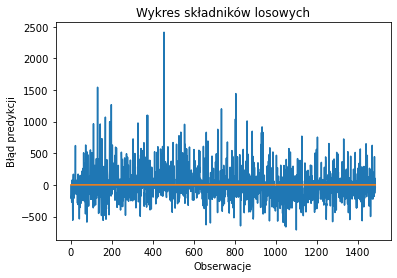

In [40]:
#Model 1 improvement - deleting variables that are not statistically significant
list_X1_del = ['Fairway_Percentage', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']

X = pga_clean[pga_clean.columns.intersection(list_X1_del)]
X = sm.tools.add_constant(X)
y = pga_clean["Points"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

#perform White's test
white_test = het_white(model.resid,  model.model.exog)
#define labels to use for output of White's test
labels = ["Test White'a", 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
#print results of White's test
print(dict(zip(labels, white_test)))

#Reszty z modelu - zb. treningowy
errors = y-predictions
plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())
RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

Suma składników losowych: -5451.945979122385
Błąd standardowy składników losowych: 287.09994614354304
RMSE:  287.74515268349273


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


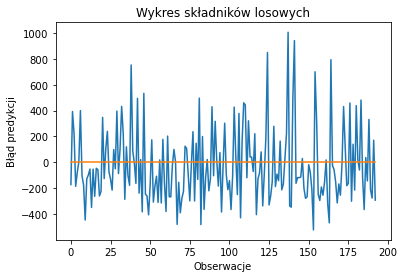

In [41]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X1_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_clean_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')
plt.plot()

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

## Scenariusz 2 - wersja inicjalna

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          5.27e-305
Time:                        11:57:13   Log-Likelihood:                -10452.
No. Observations:                1485   AIC:                         2.093e+04
Df Residuals:                    1474   BIC:                         2.098e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.348e+04   2997.259      7.834      0.000    1.76e+04    2.94e+04
Fairway_Percentage    -7.1536      3.078     -2.324      0.020     -13.191      -1.116
Avg_Distance          -2.0855      2.172     -0.960      0.337      -6.346       2.175
gir                    2.2210      5.723      0.388      0.698      -9.005      13.447
Average_Putts       -196.5326     32.938     -5.967      0.000    -261.142    -131.923
Average_Scrambling   -15.2172      3.494     -4.356      0.000     -22.070      -8.364
Average_Score       -216.7802     39.736     -5.456      0.000    -294.725    -138.835
Average_SG_Putts     175.6626     47.646      3.687      0.000      82.201     269.124
SG:OTT               386.5656     54.439      7.101      0.000     279.780     493.351
SG:APR               312.0929     43.876      7.113      0.000     226.028     398.158
SG:ARG               238.7308     55.627      4.292      0.000     129.614     347.848
==============================================================================
Omnibus:                      512.270   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2938.861
Skew:                           1.494   Prob(JB):                         0.00
Kurtosis:                       9.210   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{"Test White'a": 399.43158067757156, 'Test Statistic p-value': 1.3667647214582908e-49, 'F-Statistic': 8.032564789141604, 'F-Test p-value': 9.95931735740582e-60}
Suma składników losowych: 112859904.10226728
Błąd standardowy składników losowych: 726836.1590848508


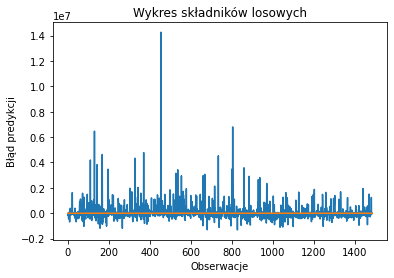

In [42]:
# SCENARIUSZ 2 - pominięcie zmiennych wysoko skorelowanych

X = pga_clean[pga_clean.columns.intersection(list_X)]
X = sm.tools.add_constant(X)
y = pga_clean["Points"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

#perform White's test
white_test = het_white(model.resid,  model.model.exog)
#define labels to use for output of White's test
labels = ["Test White'a", 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
#print results of White's test
print(dict(zip(labels, white_test)))

errors = y**2-predictions**2
plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

Suma składników losowych: -3136.3445354268015
Błąd standardowy składników losowych: 287.85709432237473


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


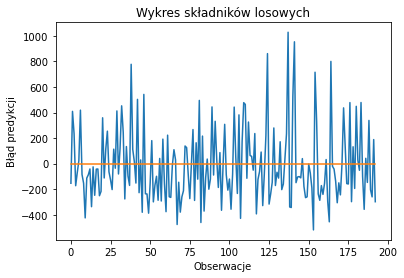

In [43]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_clean_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 2

In [44]:
print(len(pga_clean))
print(len(pga_clean_test))

1485
193


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     440.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.53e-289
Time:                        11:57:14   Log-Likelihood:                -10502.
No. Observations:                1485   AIC:                         2.102e+04
Df Residuals:                    1479   BIC:                         2.105e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1080.2735     91.549     11.800      0.000     900.694    1259.853
Fairway_Percentage    -8.4781      1.489     -5.694      0.000     -11.399      -5.557
Average_SG_Putts     509.2167     22.500     22.631      0.000     465.080     553.353
SG:OTT               543.4050     21.667     25.079      0.000     500.903     585.907
SG:APR               493.5830     20.880     23.639      0.000     452.625     534.541
SG:ARG               462.6943     35.425     13.061      0.000     393.206     532.182
==============================================================================
Omnibus:                      533.289   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3201.660
Skew:                           1.549   Prob(JB):                         0.00
Kurtosis:                       9.492   Cond. No.                         762.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

{"Test White'a": 257.65288874079977, 'Test Statistic p-value': 3.257265793938904e-43, 'F-Statistic': 15.366632049573067, 'F-Test p-value': 7.039836761578382e-48}
Suma składników losowych: 1.0695657692849636e-09
Błąd standardowy składników losowych: 285.3641805858562
RMSE:  285.26808218926493


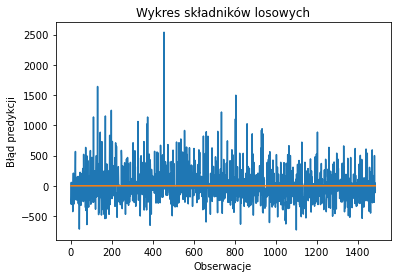

In [45]:
#Model 2 improvement - deleting variables that are not statistically significant
list_X_del = ['Fairway_Percentage', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']

X = pga_clean[pga_clean.columns.intersection(list_X_del)]
X = sm.tools.add_constant(X)
y = pga_clean["Points"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

#perform White's test
white_test = het_white(model.resid,  model.model.exog)
#define labels to use for output of White's test
labels = ["Test White'a", 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
#print results of White's test
print(dict(zip(labels, white_test)))


errors = y-predictions
plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())
RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

Suma składników losowych: -5152.856669277243
Błąd standardowy składników losowych: 313.74191715617997
RMSE:  314.06494962051653


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


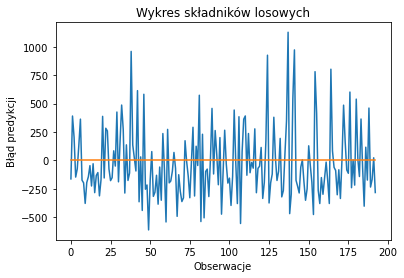

In [46]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_clean_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

## Scenariusz 3 - wersja inicjalna

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.53e-245
Time:                        11:57:14   Log-Likelihood:                -9069.2
No. Observations:                1360   AIC:                         1.816e+04
Df Residuals:                    1349   BIC:                         1.822e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.416e+04   2179.904      6.497      0.000    9886.370    1.84e+04
Fairway_Percentage    -4.2138      2.215     -1.902      0.057      -8.560       0.132
Avg_Distance          -2.5112      1.563     -1.607      0.108      -5.577       0.555
gir                   -6.7241      4.083     -1.647      0.100     -14.734       1.286
Average_Putts        -92.6871     23.746     -3.903      0.000    -139.269     -46.105
Average_Scrambling   -10.3404      2.504     -4.130      0.000     -15.252      -5.428
Average_Score       -125.4809     28.881     -4.345      0.000    -182.138     -68.824
Average_SG_Putts     182.4534     34.284      5.322      0.000     115.198     249.709
SG:OTT               344.2352     39.219      8.777      0.000     267.298     421.172
SG:APR               266.1599     31.898      8.344      0.000     203.584     328.735
SG:ARG               203.7070     39.999      5.093      0.000     125.239     282.175
==============================================================================
Omnibus:                      119.501   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.763
Skew:                           0.741   Prob(JB):                     2.48e-34
Kurtosis:                       3.733   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: -2.015440259128809e-09
Błąd standardowy składników losowych: 190.55411163463125


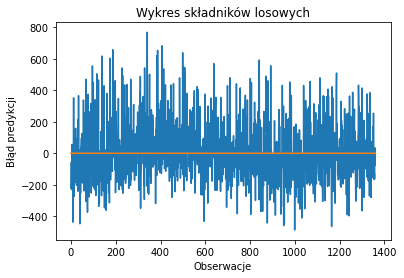

In [47]:
# SCENARIUSZ 3 - pomienięcie obserwacji outlier

X = pga_no_outliers[pga_no_outliers.columns.intersection(list_X)]
X = sm.tools.add_constant(X)
y = pga_no_outliers["Points"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

errors = y-predictions
plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Suma składników losowych: -230.84957314196959
Błąd standardowy składników losowych: 217.7244450209859


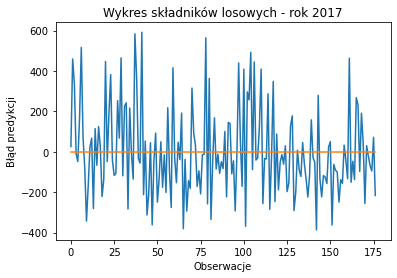

In [48]:
X_test = pga_no_outliers_test[pga_no_outliers_test.columns.intersection(list_X)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_no_outliers_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 3

In [49]:
print(len(pga_no_outliers))
print(len(pga_no_outliers_test))


1360
177


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Points   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     231.7
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          3.99e-247
Time:                        11:57:14   Log-Likelihood:                -9071.0
No. Observations:                1360   AIC:                         1.816e+04
Df Residuals:                    1351   BIC:                         1.821e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.323e+04   2094.227      6.317      0.000    9120.801    1.73e+04
gir                   -8.7227      3.948     -2.210      0.027     -16.467      -0.978
Average_Putts        -93.1598     23.696     -3.931      0.000    -139.644     -46.675
Average_Scrambling   -10.6393      2.379     -4.472      0.000     -15.306      -5.973
Average_Score       -123.9388     28.886     -4.291      0.000    -180.605     -67.273
Average_SG_Putts     183.6158     34.293      5.354      0.000     116.343     250.889
SG:OTT               308.6181     32.298      9.555      0.000     245.258     371.978
SG:APR               270.5982     31.831      8.501      0.000     208.154     333.042
SG:ARG               210.9132     39.807      5.298      0.000     132.822     289.004
==============================================================================
Omnibus:                      115.934   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.194
Skew:                           0.727   Prob(JB):                     4.01e-33
Kurtosis:                       3.722   Cond. No.                     4.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

{"Test White'a": 130.44163513508116, 'Test Statistic p-value': 1.710496626037399e-10, 'F-Statistic': 3.1705905570389015, 'F-Test p-value': 3.9595364713790465e-11}
Suma składników losowych: 3.54702933691442e-09
Błąd standardowy składników losowych: 190.8095617785329
RMSE:  190.73939830428026


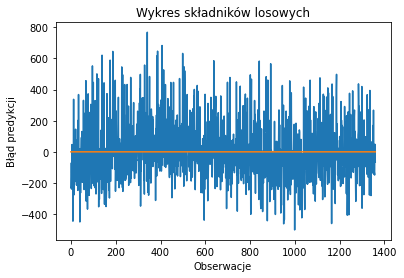

In [50]:
#Model 3 improvement - deleting variables that are not statistically significant
list_X_del = [ 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']

X = pga_no_outliers[pga_no_outliers.columns.intersection(list_X_del)]
X = sm.tools.add_constant(X)
y = pga_no_outliers["Points"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

#perform White's test
white_test = het_white(model.resid,  model.model.exog)
#define labels to use for output of White's test
labels = ["Test White'a", 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
#print results of White's test
print(dict(zip(labels, white_test)))

errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Suma składników losowych: -2902.665658967733
Błąd standardowy składników losowych: 215.32433580944289
RMSE:  215.3405627759455


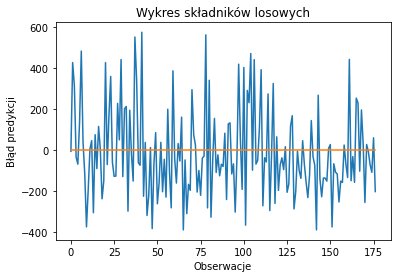

In [51]:
X_test = pga_no_outliers_test[pga_no_outliers_test.columns.intersection(list_X_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_no_outliers_test["Points"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

RMSE = (sum(errors**2)/(len(errors)))**0.5
print("RMSE: ", RMSE)

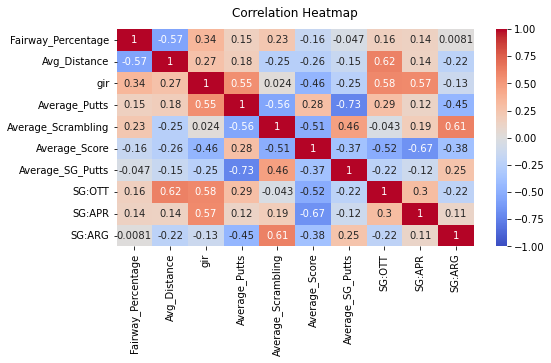

In [52]:
pga_heat = pga_clean[['Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']]

plt.figure(figsize=(8,4))
heatmap = sns.heatmap(pga_heat.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

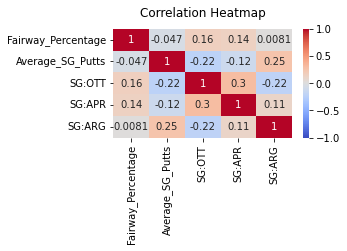

In [53]:
pga_heat = pga_clean[['Fairway_Percentage', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']]

plt.figure(figsize=(4,2))
heatmap = sns.heatmap(pga_heat.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);